# EDA - Marketing Campaign Dataset


Este notebook realiza un análisis exploratorio del dataset de campañas de marketing. El objetivo es preparar los datos para modelado supervisado (clasificación) y entender relaciones entre variables.


## Librerias y configuraciones

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


## Cargar el dataset

In [67]:
df = pd.read_csv('../data/marketing_campaign.csv', sep=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## Análisis General

In [68]:
# Información general del dataset
df.info()

# Estadísticas descriptivas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Podemos observar que las variables Z_CostContact y Z_Revenue no dan mucha informacion ya que tienen el mismo valor para todos los registros. Por lo tanto las podemos eliminar en el preprocesamiento.

In [69]:
# Eliminar columnas innecesarias
df = df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'])

In [70]:
# Verificar valores nulos
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

Podemos ver que la unica columna que tiene valores nulos es la columna Income con 24 valores nulos, para subsanar esto podemos eliminar estos registros en la etapa de preprocesamiento ya que son muy pocos.

In [71]:
# Eliminar registros con valores nulos
df = df.dropna()
# Verificar valores nulos
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [72]:
# Verificar duplicados
df.duplicated().sum()

np.int64(182)

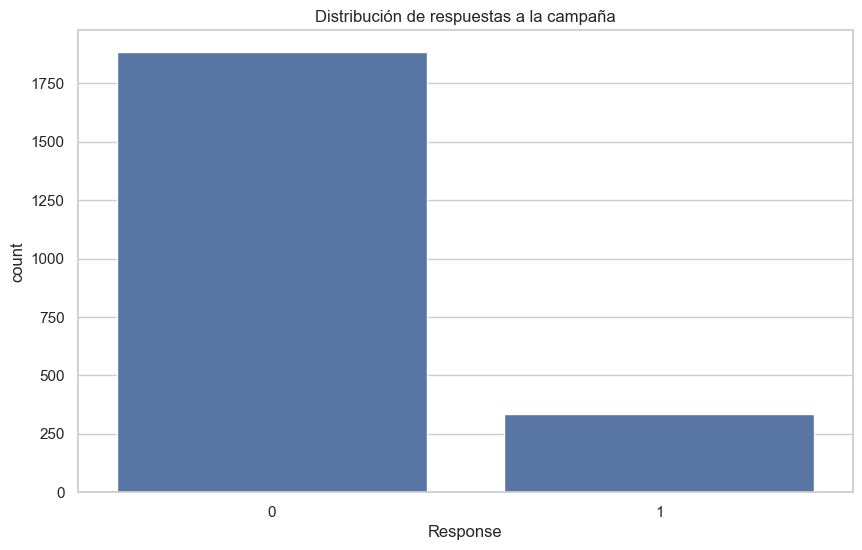

Response
0    0.849729
1    0.150271
Name: proportion, dtype: float64

In [73]:
# Distribución de la variable target
sns.countplot(x='Response', data=df)
plt.title('Distribución de respuestas a la campaña')
plt.show()

df['Response'].value_counts(normalize=True)


La variable objetivo `Response` está desbalanceada: la mayoría de los clientes no respondió positivamente a la campaña (clase 0), mientras que solo una minoría respondió afirmativamente (clase 1). Esto indica un problema de desbalance de clases, que es común en problemas de marketing y debe tenerse en cuenta al entrenar modelos de clasificación.

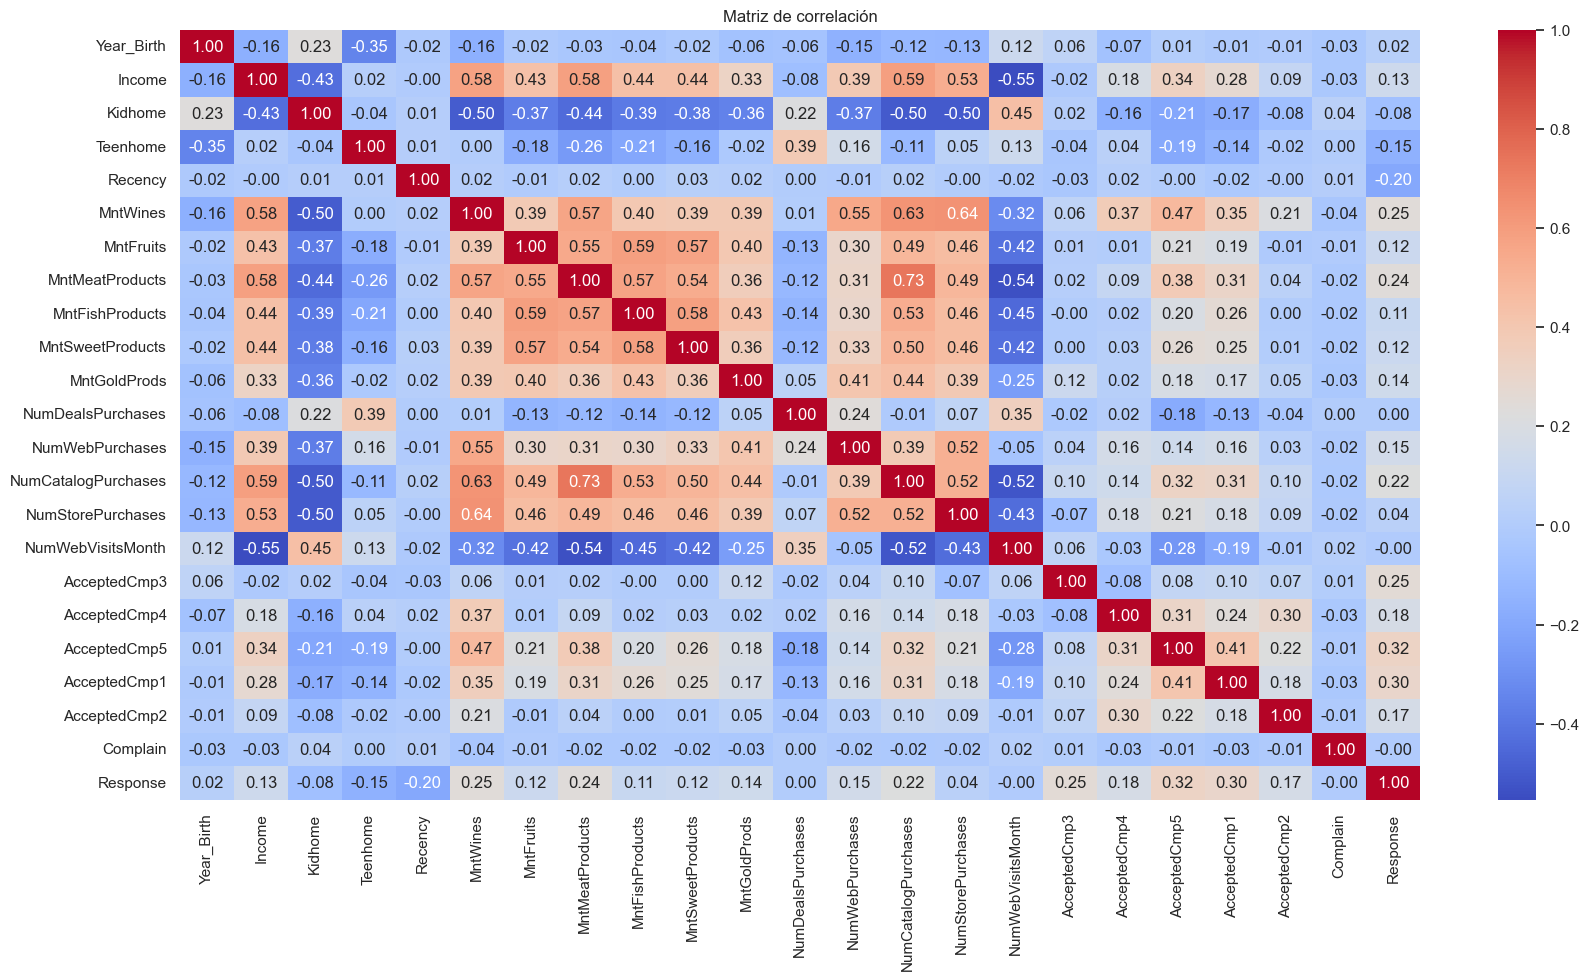

In [74]:
# Correlación entre variables numéricas
corr = df.corr(numeric_only=True)
plt.figure(figsize=(20, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Matriz de correlación')
plt.show()


In [75]:
corr

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
Year_Birth,1.000000,-0.161791,0.233615,-0.350791,-0.016295,-0.159451,-0.017747,-0.033697,-0.040425,-0.020204,...,-0.121764,-0.127891,0.123904,0.061784,-0.066109,0.010575,-0.009611,-0.006717,-0.030407,0.023692
Income,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,...,0.589162,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,0.133047
Kidhome,0.233615,-0.428669,1.000000,-0.039869,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,-0.378026,...,-0.504501,-0.501349,0.447477,0.016066,-0.162026,-0.205305,-0.174163,-0.081868,0.040978,-0.077909
Teenhome,-0.350791,0.019133,-0.039869,1.000000,0.013838,0.003747,-0.176558,-0.261122,-0.205242,-0.163056,...,-0.112692,0.049737,0.131240,-0.042522,0.038376,-0.190791,-0.144855,-0.015521,0.003307,-0.153901
Recency,-0.016295,-0.003970,0.011492,0.013838,1.000000,0.015721,-0.005844,0.022518,0.000551,0.025110,...,0.024081,-0.000434,-0.018564,-0.032257,0.017566,-0.000482,-0.021061,-0.001400,0.013637,-0.199766
MntWines,-0.159451,0.578650,-0.497336,0.003747,0.015721,1.000000,0.387024,0.568860,0.397721,0.390326,...,0.634753,0.640012,-0.321978,0.061463,0.373143,0.473550,0.351417,0.206185,-0.039470,0.246299
MntFruits,-0.017747,0.430842,-0.373396,-0.176558,-0.005844,0.387024,1.000000,0.547822,0.593431,0.571606,...,0.486263,0.458491,-0.418729,0.014424,0.006396,0.212871,0.191816,-0.009980,-0.005324,0.122443
MntMeatProducts,-0.033697,0.584633,-0.439261,-0.261122,0.022518,0.568860,0.547822,1.000000,0.573574,0.535136,...,0.734127,0.486006,-0.539484,0.018438,0.091618,0.376867,0.313076,0.043521,-0.023782,0.237746
MntFishProducts,-0.040425,0.438871,-0.388884,-0.205242,0.000551,0.397721,0.593431,0.573574,1.000000,0.583867,...,0.532757,0.457745,-0.446423,-0.000219,0.016105,0.196277,0.261608,0.002345,-0.021220,0.108145
MntSweetProducts,-0.020204,0.440744,-0.378026,-0.163056,0.025110,0.390326,0.571606,0.535136,0.583867,1.000000,...,0.495136,0.455225,-0.422371,0.001780,0.029313,0.259230,0.245102,0.010188,-0.022641,0.116170


La matriz de correlación permite identificar relaciones lineales entre variables numéricas. Se observa que algunas variables de gasto están fuertemente correlacionadas entre sí (por ejemplo, los diferentes tipos de productos comprados), lo que puede indicar redundancia o multicolinealidad. Además, la variable objetivo `Response` muestra correlaciones positivas moderadas con algunas variables de gasto y aceptación de campañas previas, lo que sugiere que los clientes que gastan más o han aceptado campañas anteriores tienen mayor probabilidad de responder positivamente. Es importante considerar estas correlaciones al seleccionar variables para el modelado.

## Análisis univariado de variables

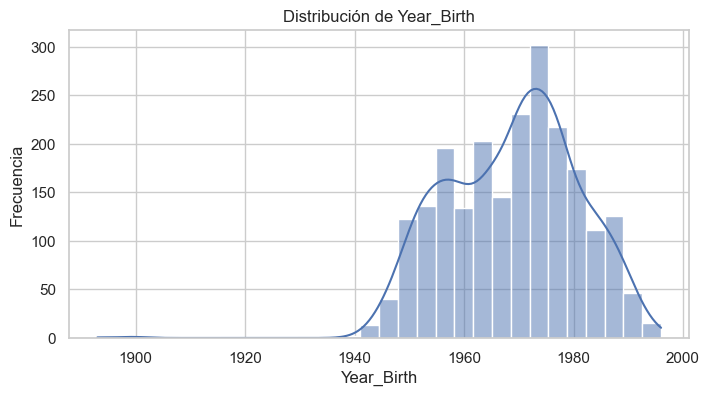

count    2216.000000
mean     1968.820397
std        11.985554
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

------------------------------------------------------------



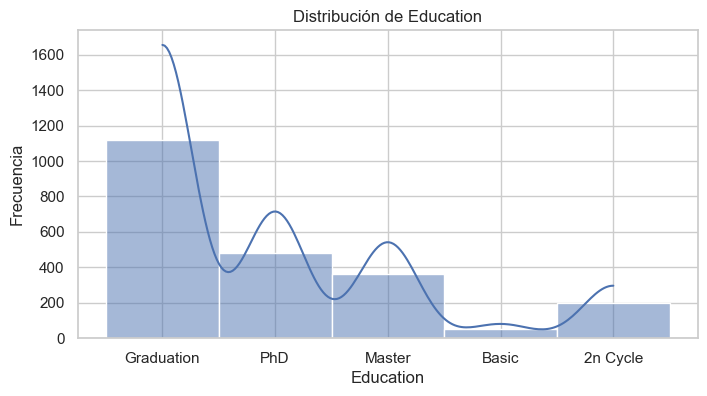

count           2216
unique             5
top       Graduation
freq            1116
Name: Education, dtype: object

------------------------------------------------------------



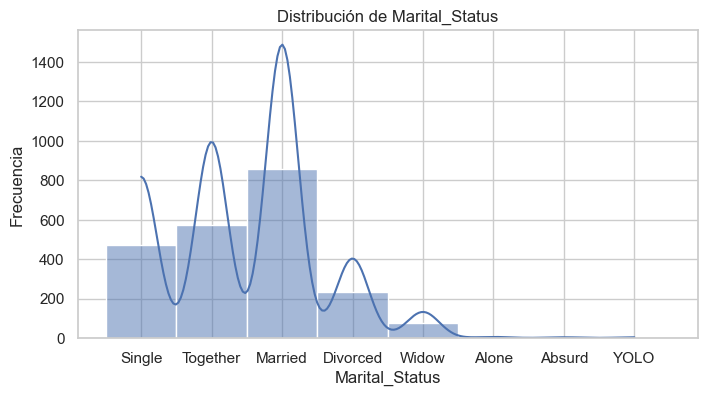

count        2216
unique          8
top       Married
freq          857
Name: Marital_Status, dtype: object

------------------------------------------------------------



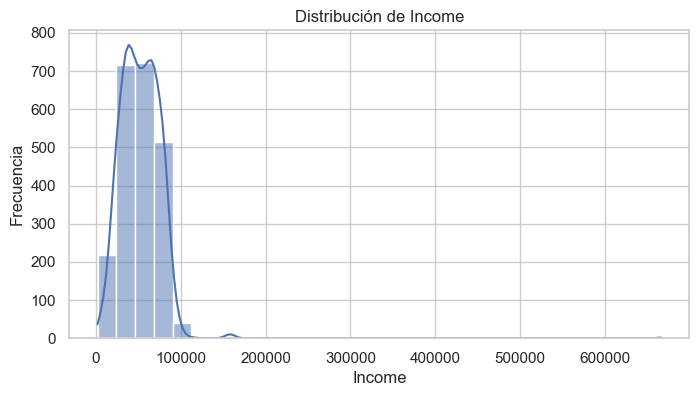

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

------------------------------------------------------------



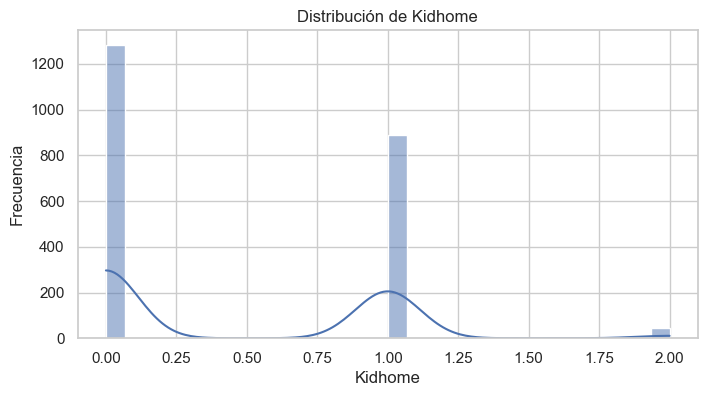

count    2216.000000
mean        0.441787
std         0.536896
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Kidhome, dtype: float64

------------------------------------------------------------



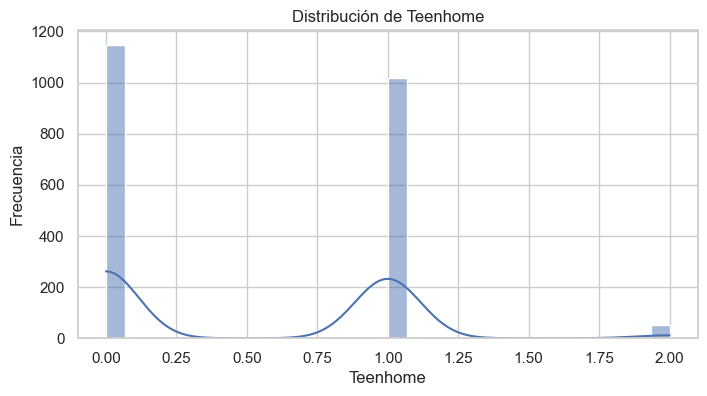

count    2216.000000
mean        0.505415
std         0.544181
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Teenhome, dtype: float64

------------------------------------------------------------



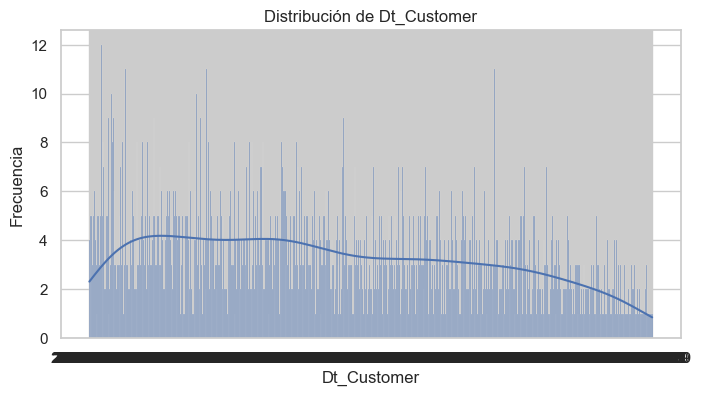

count           2216
unique           662
top       2012-08-31
freq              12
Name: Dt_Customer, dtype: object

------------------------------------------------------------



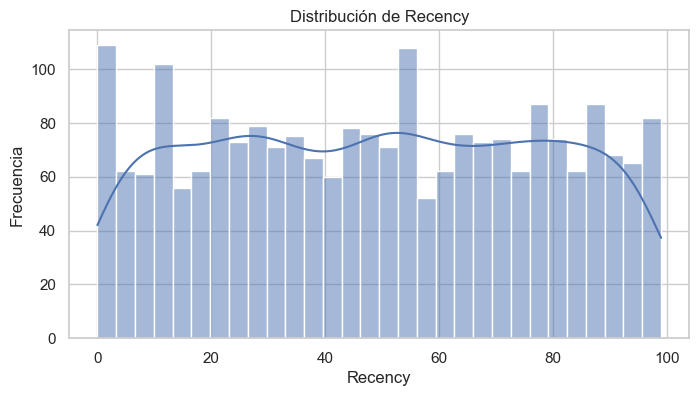

count    2216.000000
mean       49.012635
std        28.948352
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

------------------------------------------------------------



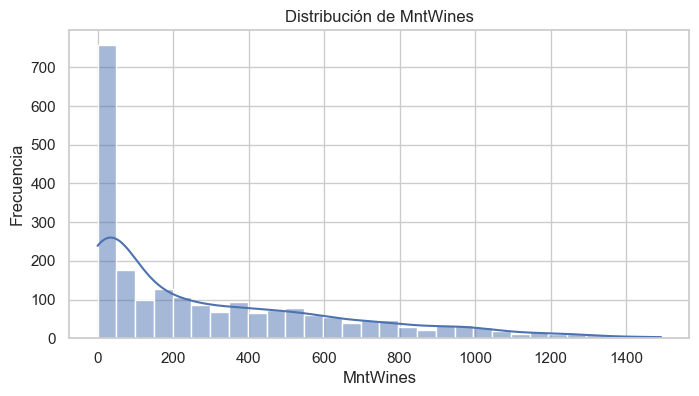

count    2216.000000
mean      305.091606
std       337.327920
min         0.000000
25%        24.000000
50%       174.500000
75%       505.000000
max      1493.000000
Name: MntWines, dtype: float64

------------------------------------------------------------



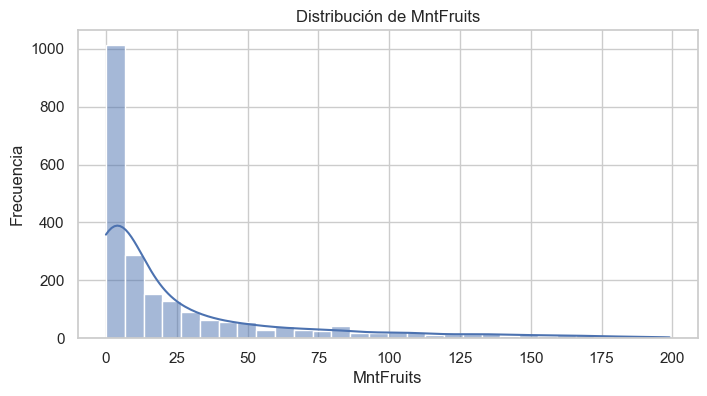

count    2216.000000
mean       26.356047
std        39.793917
min         0.000000
25%         2.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: MntFruits, dtype: float64

------------------------------------------------------------



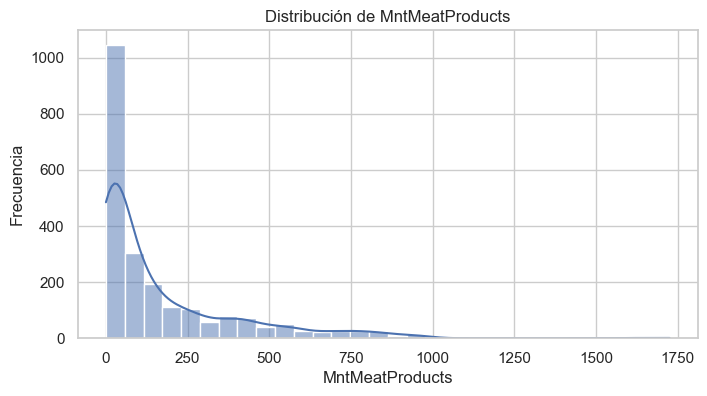

count    2216.000000
mean      166.995939
std       224.283273
min         0.000000
25%        16.000000
50%        68.000000
75%       232.250000
max      1725.000000
Name: MntMeatProducts, dtype: float64

------------------------------------------------------------



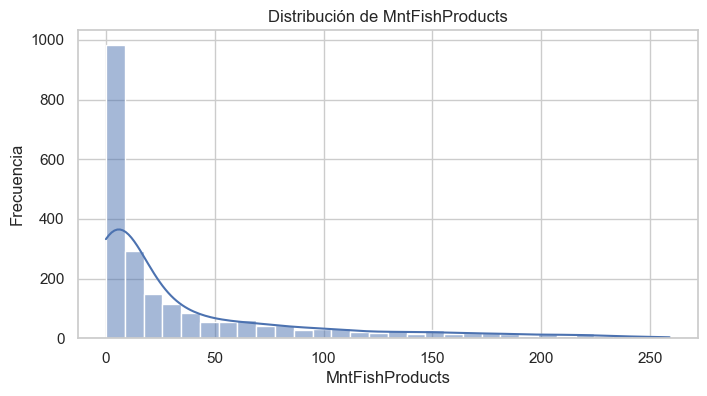

count    2216.000000
mean       37.637635
std        54.752082
min         0.000000
25%         3.000000
50%        12.000000
75%        50.000000
max       259.000000
Name: MntFishProducts, dtype: float64

------------------------------------------------------------



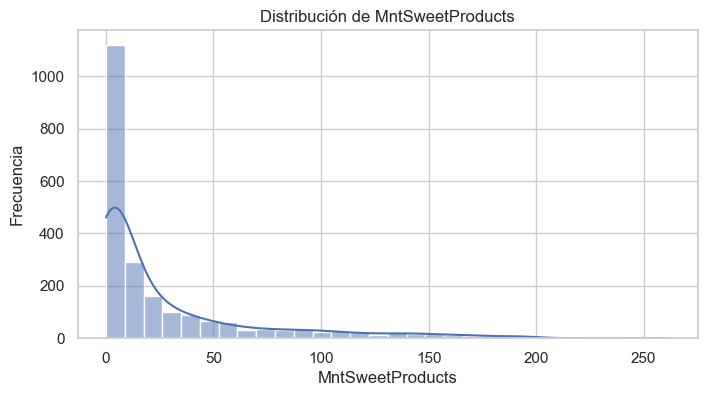

count    2216.000000
mean       27.028881
std        41.072046
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       262.000000
Name: MntSweetProducts, dtype: float64

------------------------------------------------------------



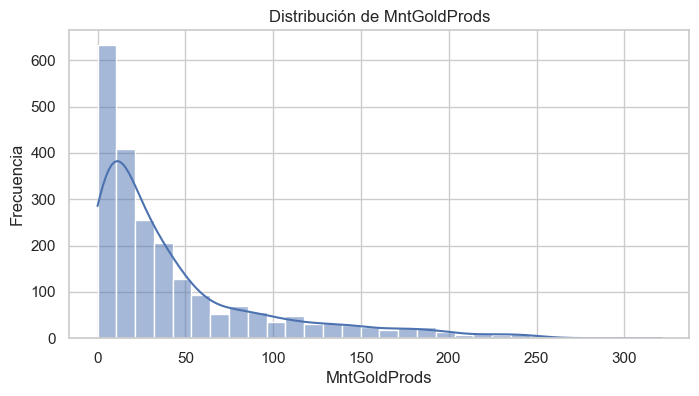

count    2216.000000
mean       43.965253
std        51.815414
min         0.000000
25%         9.000000
50%        24.500000
75%        56.000000
max       321.000000
Name: MntGoldProds, dtype: float64

------------------------------------------------------------



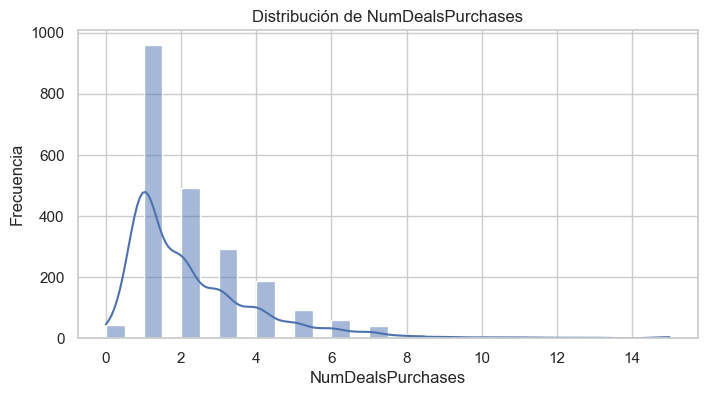

count    2216.000000
mean        2.323556
std         1.923716
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64

------------------------------------------------------------



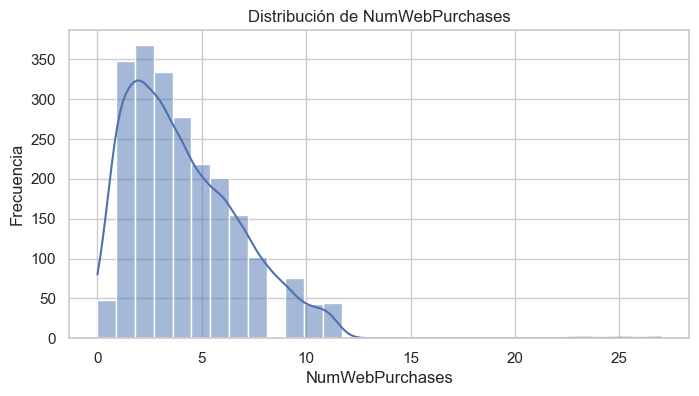

count    2216.000000
mean        4.085289
std         2.740951
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64

------------------------------------------------------------



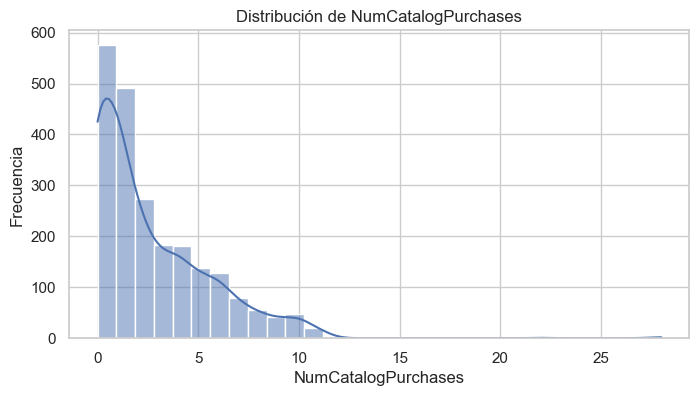

count    2216.000000
mean        2.671029
std         2.926734
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64

------------------------------------------------------------



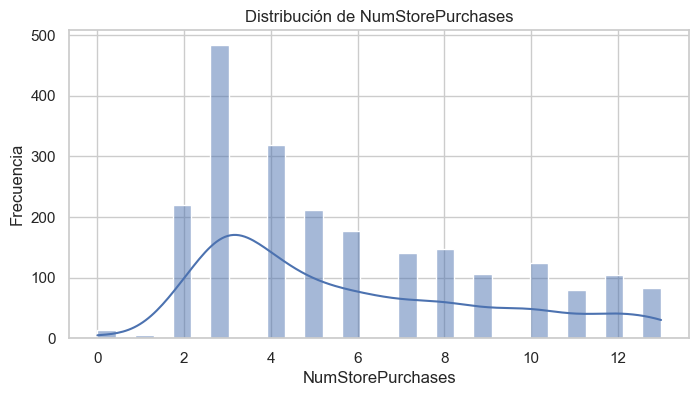

count    2216.000000
mean        5.800993
std         3.250785
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64

------------------------------------------------------------



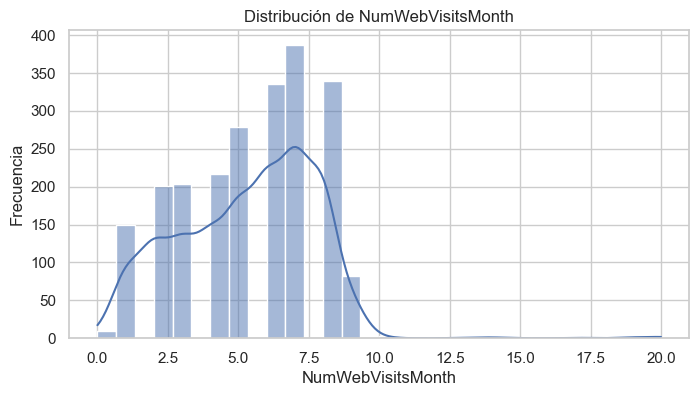

count    2216.000000
mean        5.319043
std         2.425359
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

------------------------------------------------------------



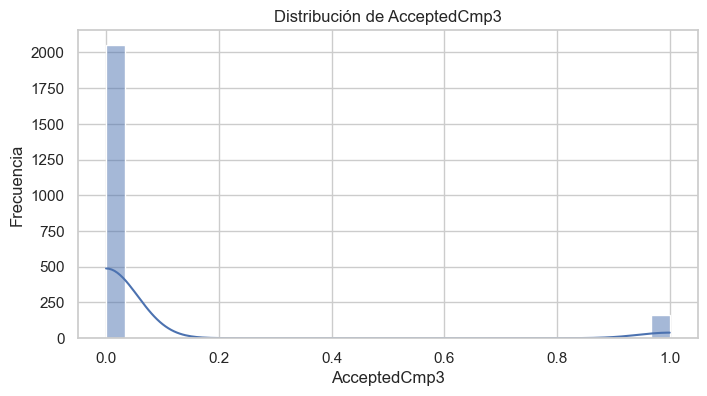

count    2216.000000
mean        0.073556
std         0.261106
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: AcceptedCmp3, dtype: float64

------------------------------------------------------------



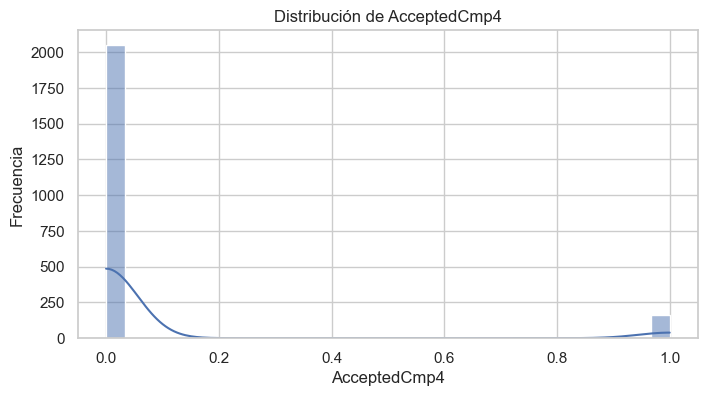

count    2216.000000
mean        0.074007
std         0.261842
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: AcceptedCmp4, dtype: float64

------------------------------------------------------------



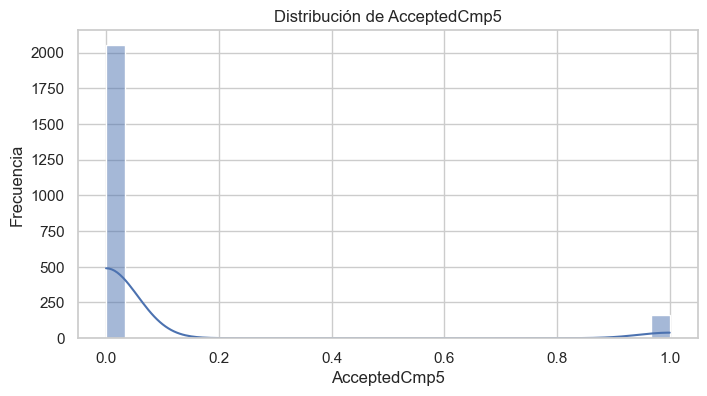

count    2216.000000
mean        0.073105
std         0.260367
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: AcceptedCmp5, dtype: float64

------------------------------------------------------------



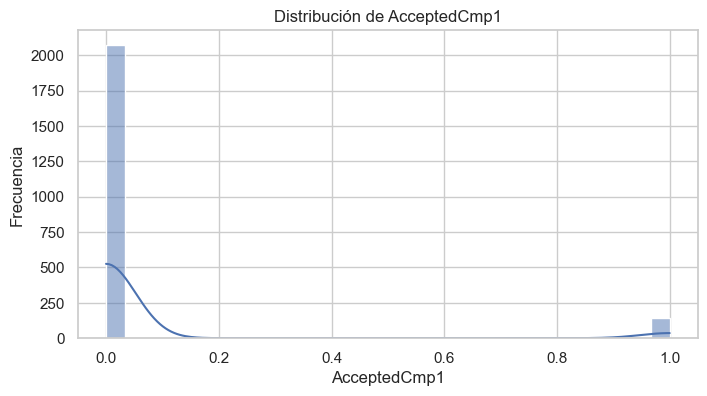

count    2216.000000
mean        0.064079
std         0.244950
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: AcceptedCmp1, dtype: float64

------------------------------------------------------------



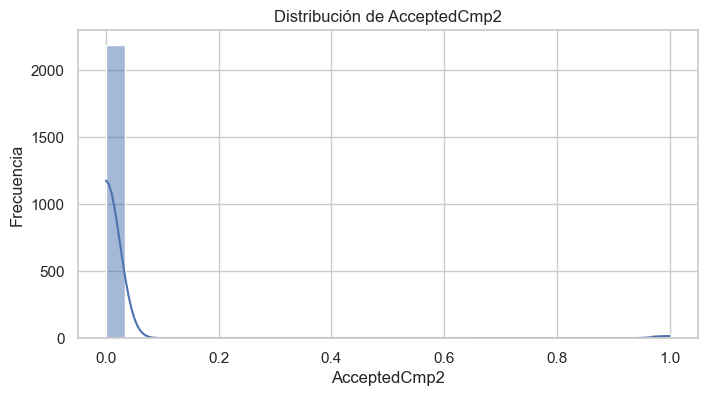

count    2216.000000
mean        0.013538
std         0.115588
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: AcceptedCmp2, dtype: float64

------------------------------------------------------------



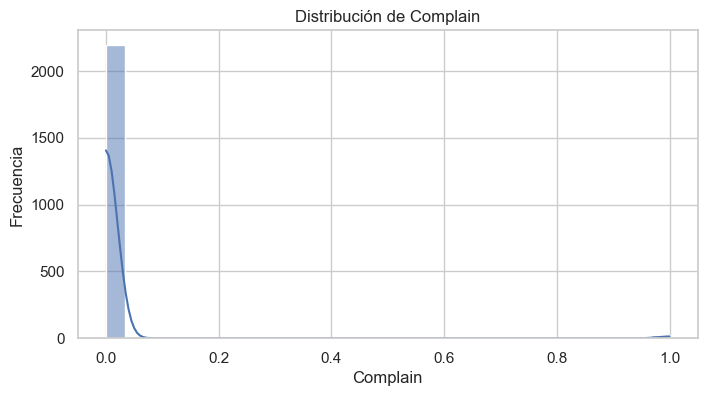

count    2216.000000
mean        0.009477
std         0.096907
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Complain, dtype: float64

------------------------------------------------------------



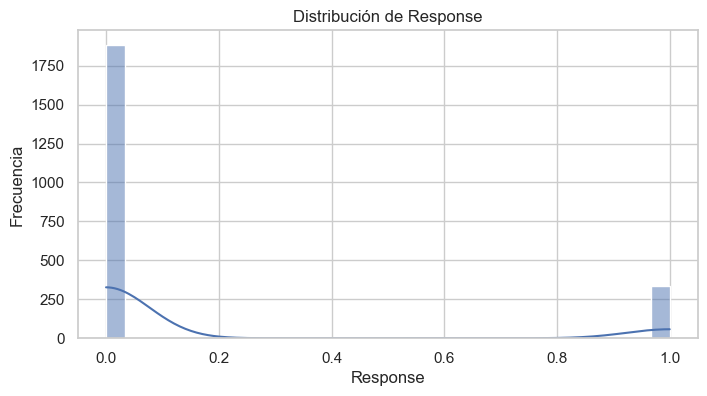

count    2216.000000
mean        0.150271
std         0.357417
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Response, dtype: float64

------------------------------------------------------------



In [76]:
for var in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[var].dropna(), kde=True, bins=30)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()
    print(df[var].describe())
    print('\n' + '-'*60 + '\n')

## Análisis univariado de variables con distribucion por clases de Response

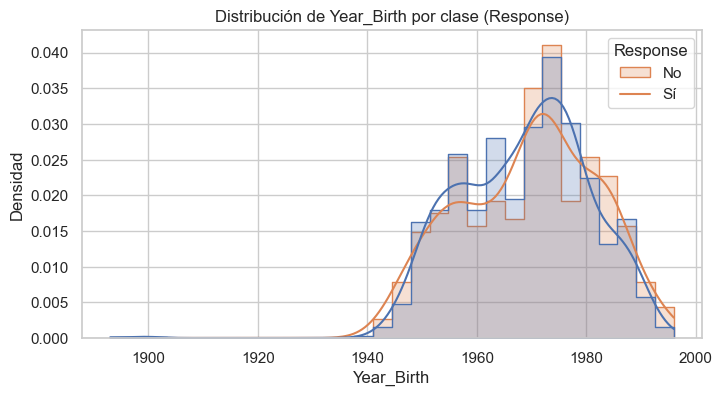

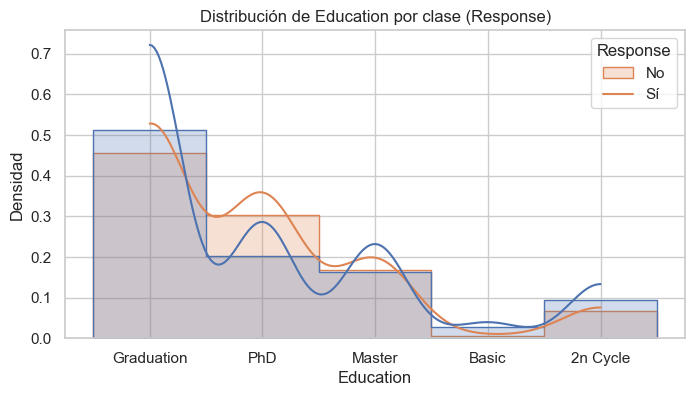

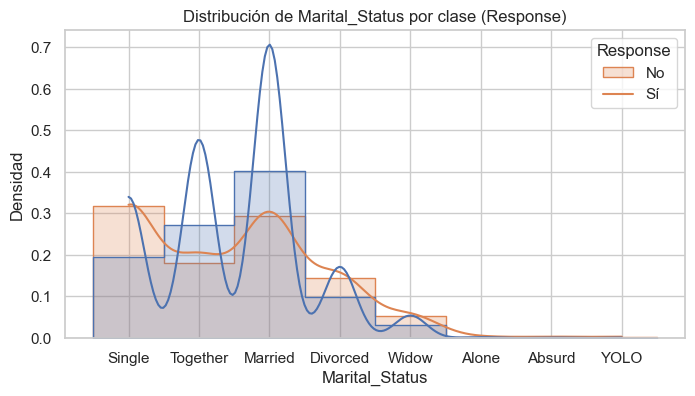

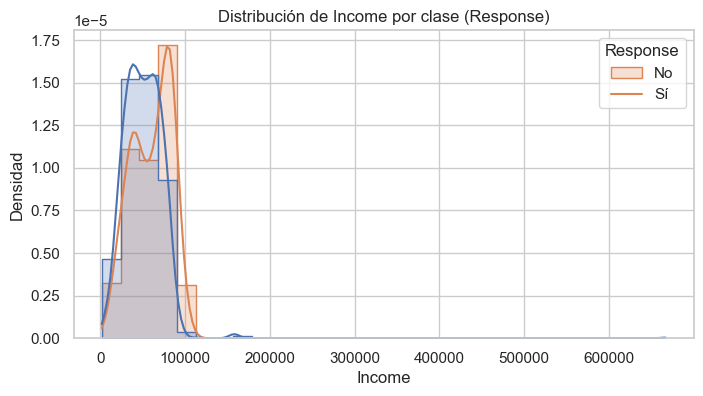

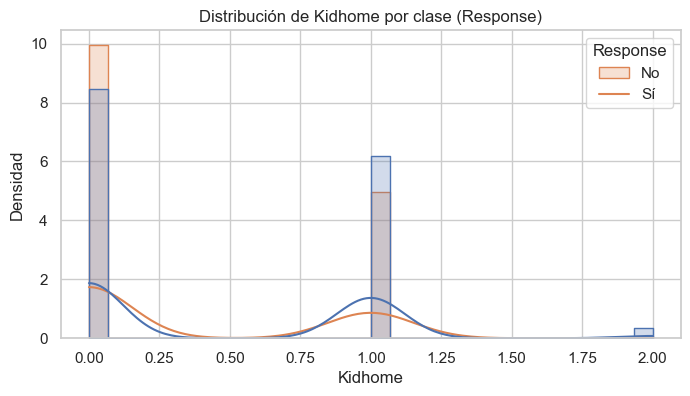

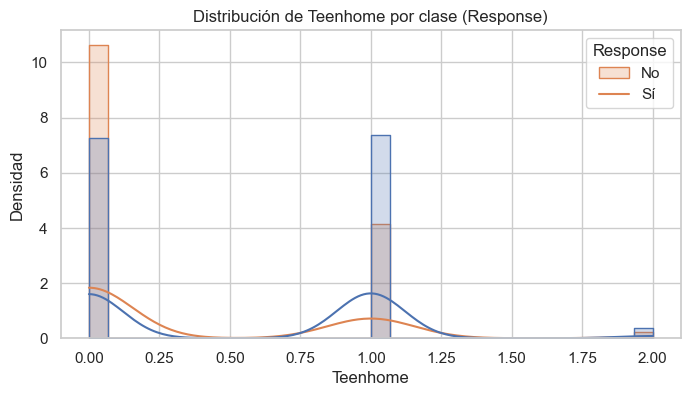

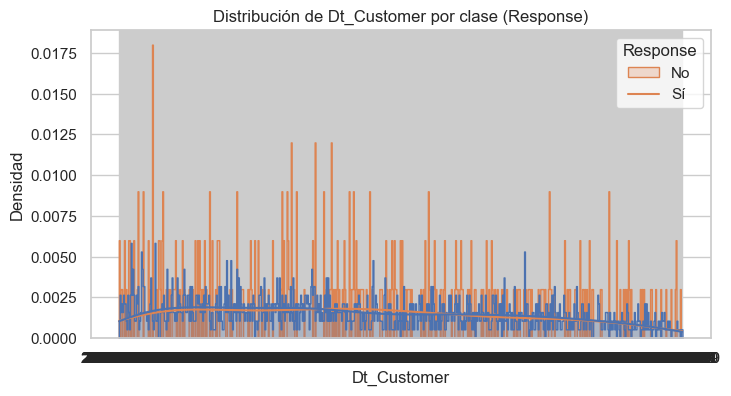

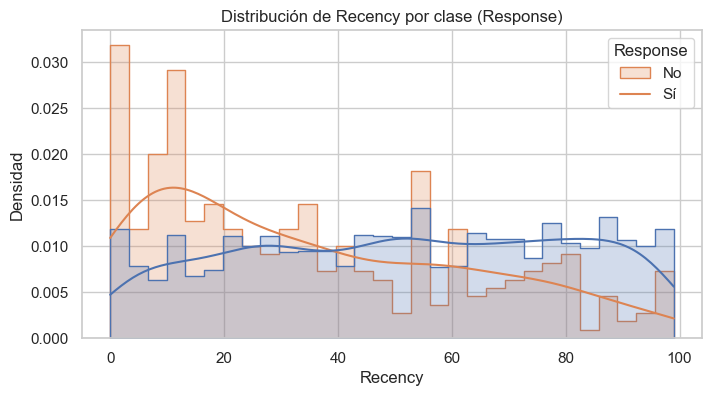

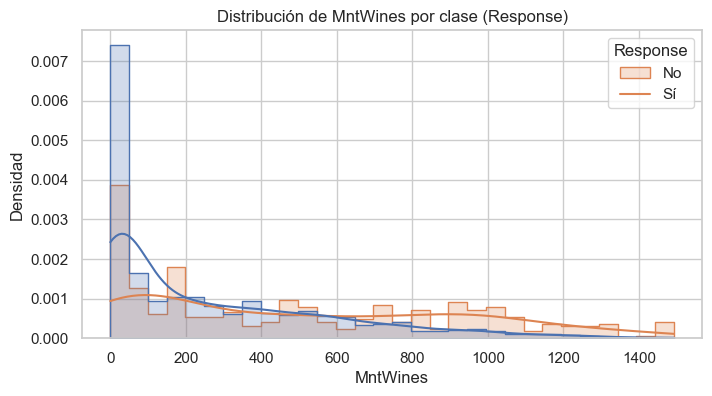

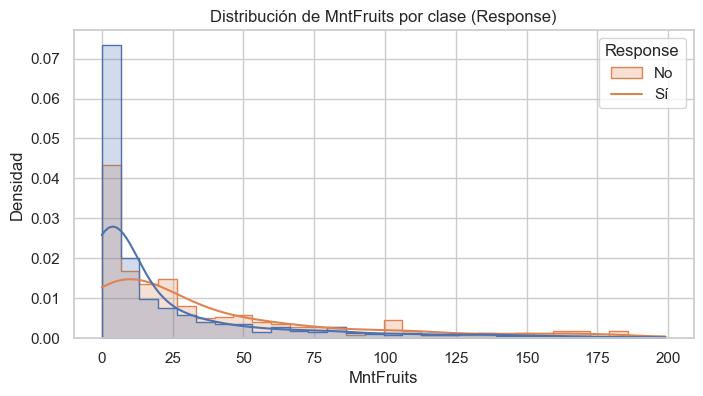

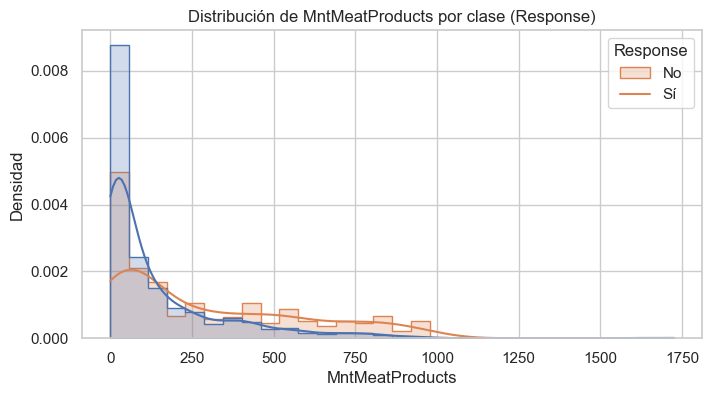

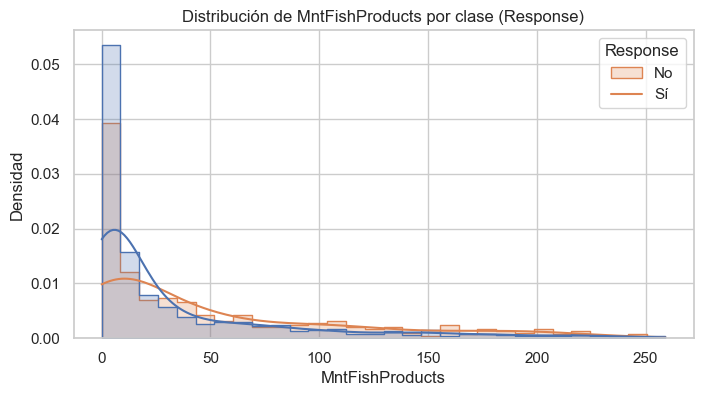

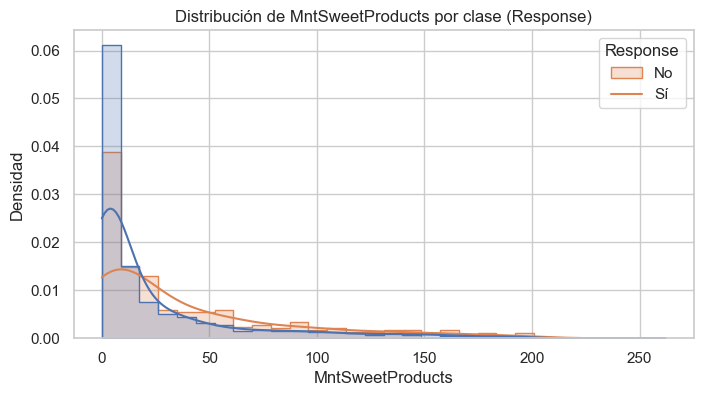

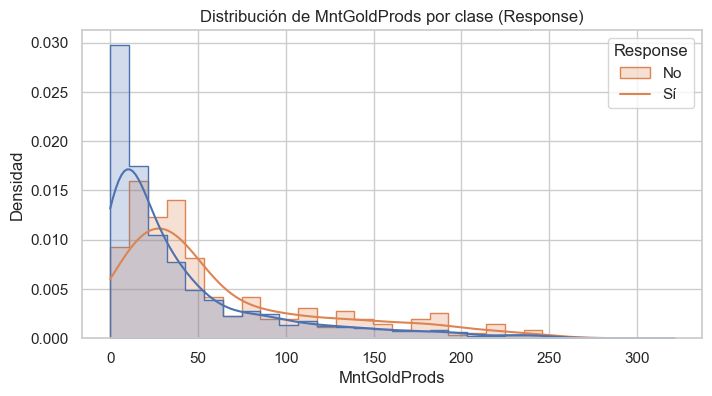

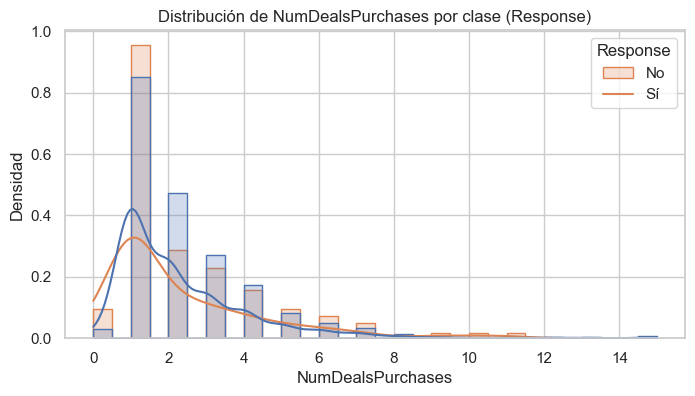

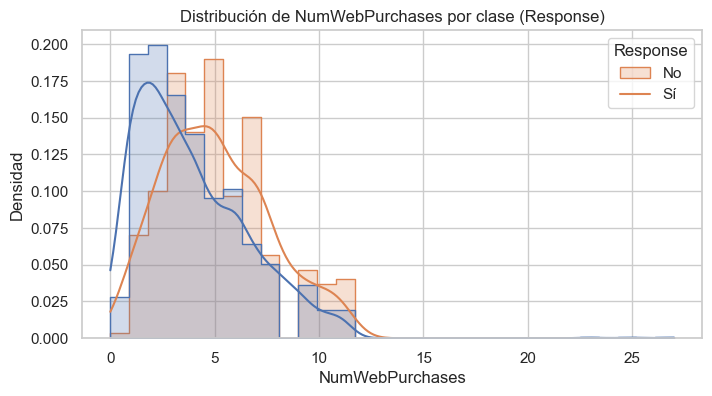

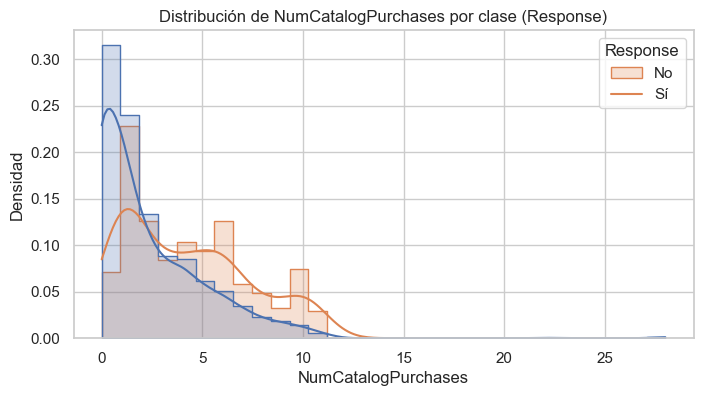

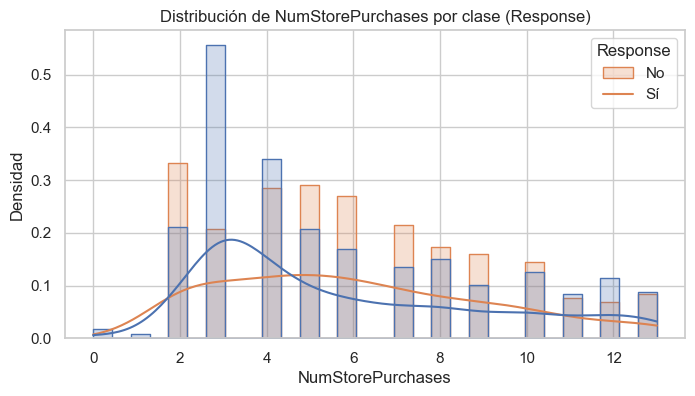

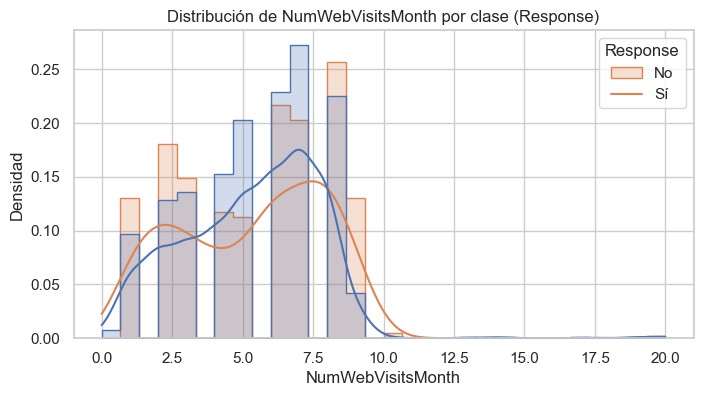

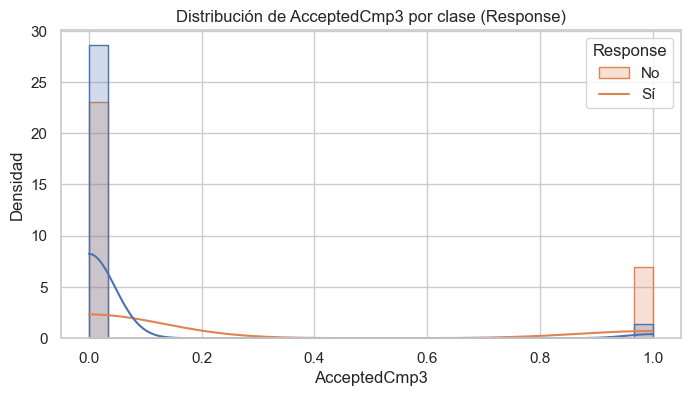

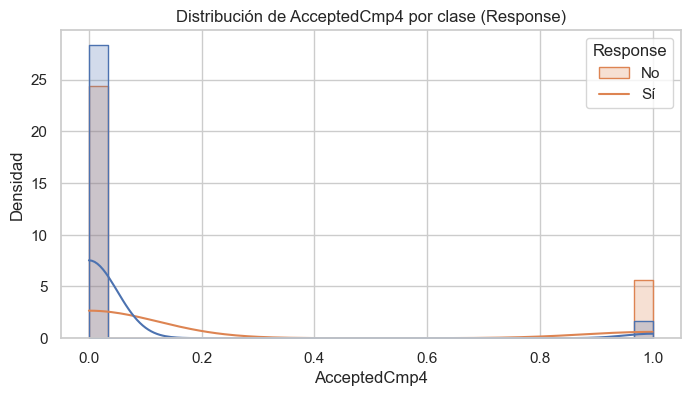

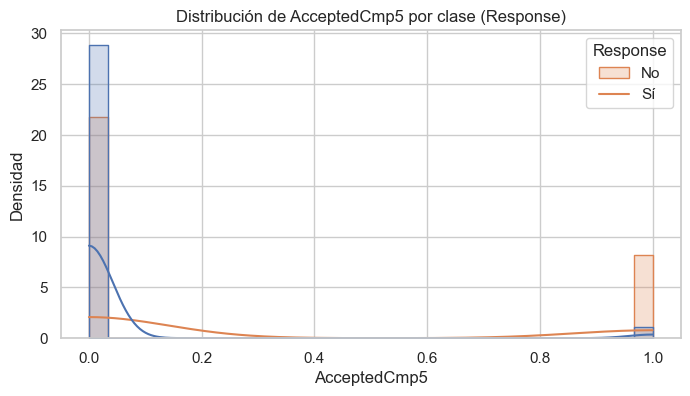

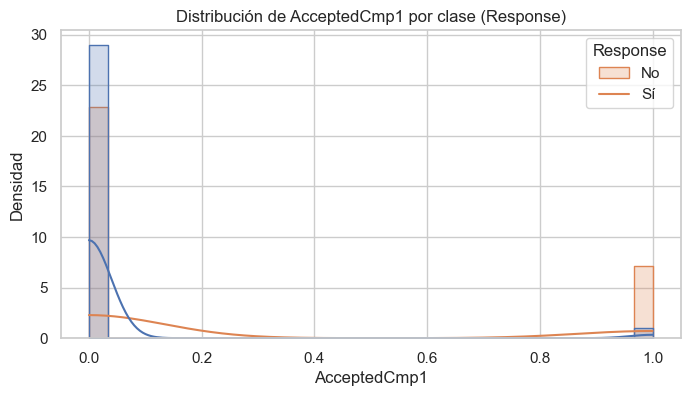

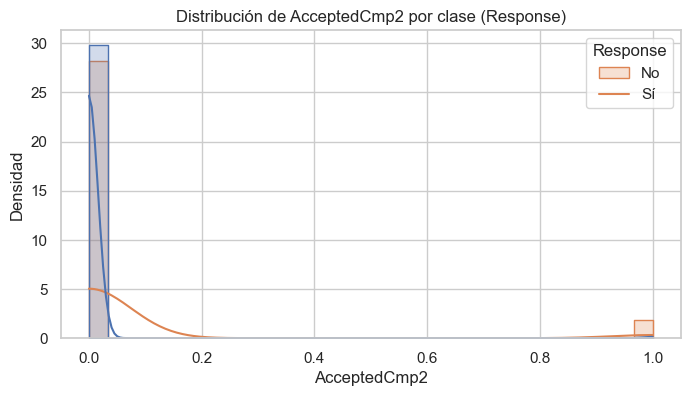

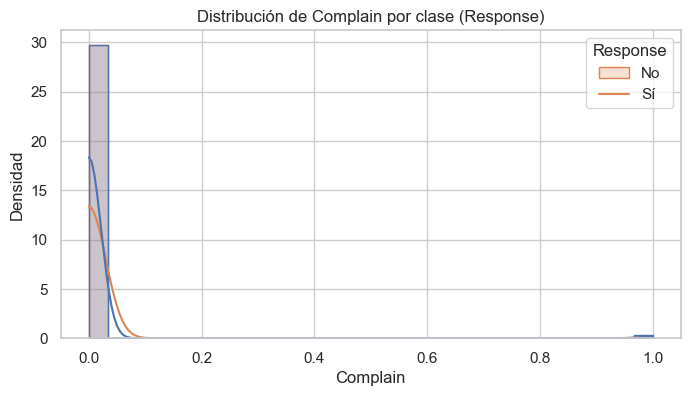

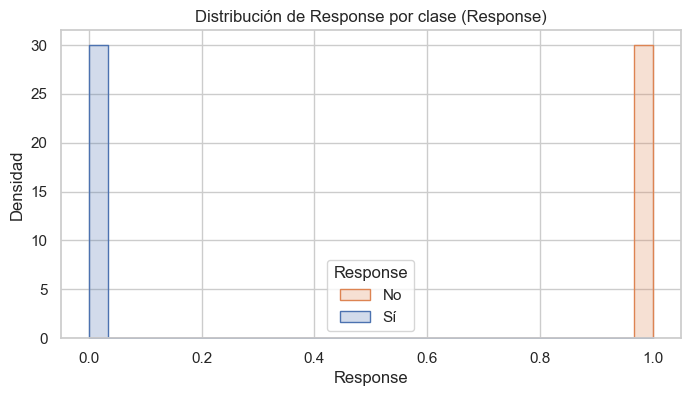

In [77]:
for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='Response', kde=True, bins=30, element='step', stat='density', common_norm=False)
    plt.title(f'Distribución de {col} por clase (Response)')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.legend(title='Response', labels=['No', 'Sí'])
    plt.show()

## Boxplots de varibales interesantes segun Response

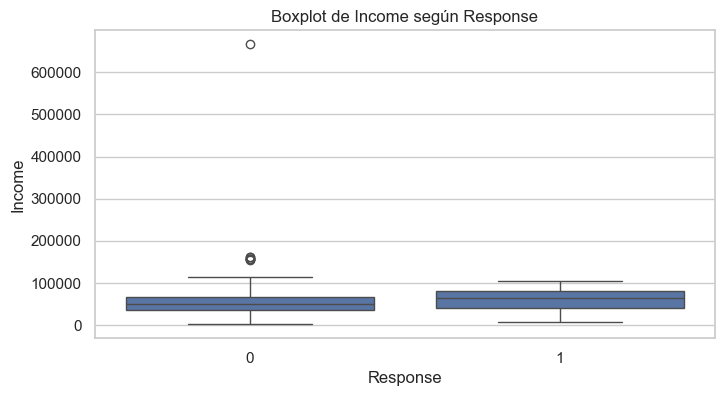

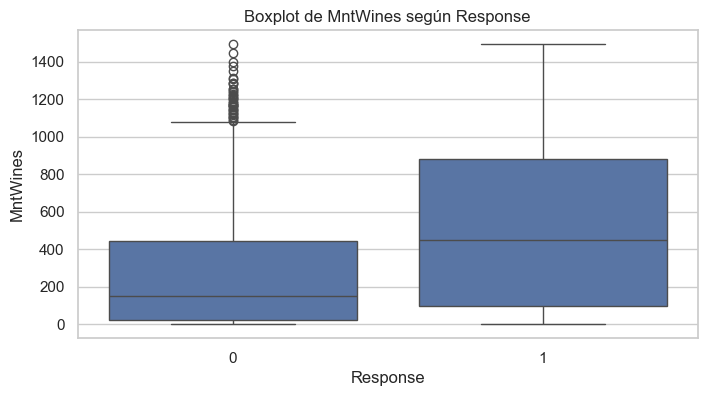

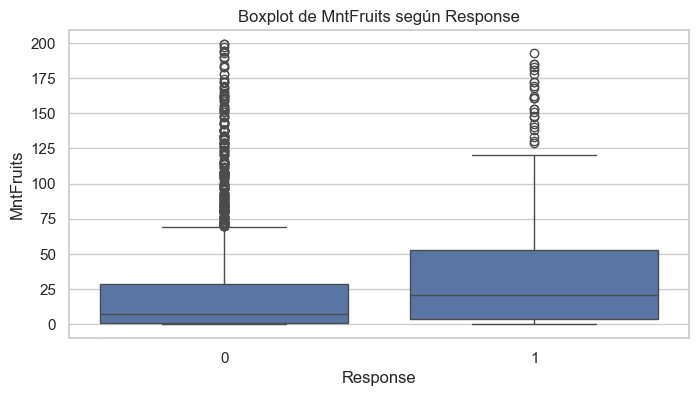

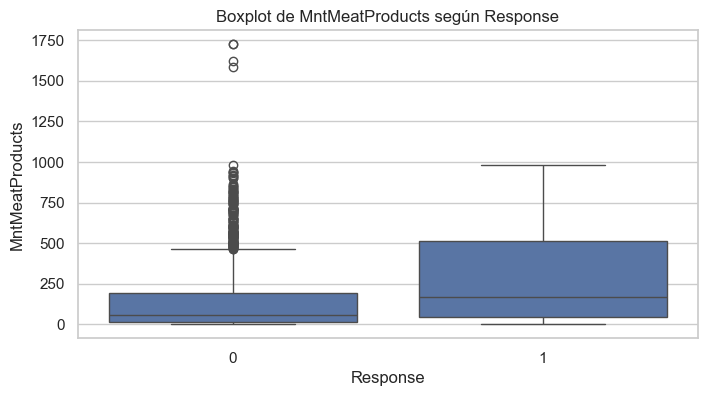

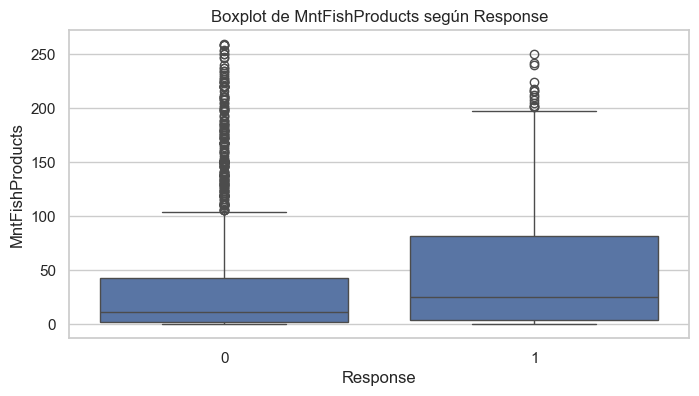

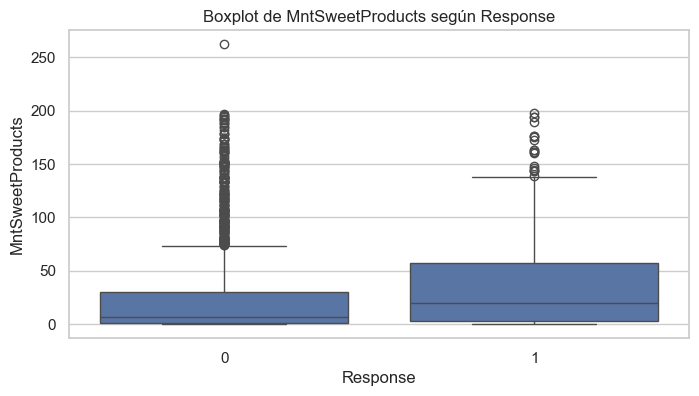

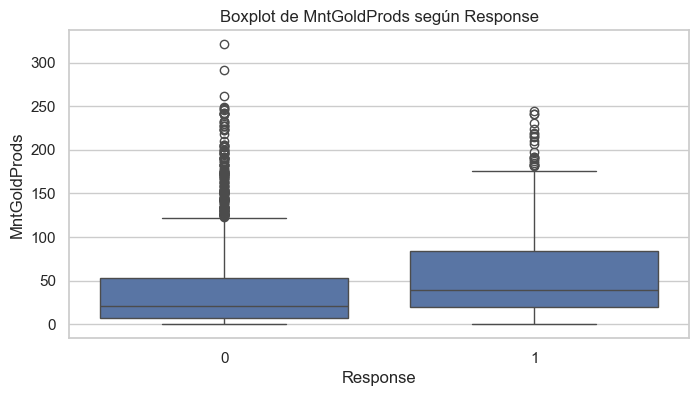

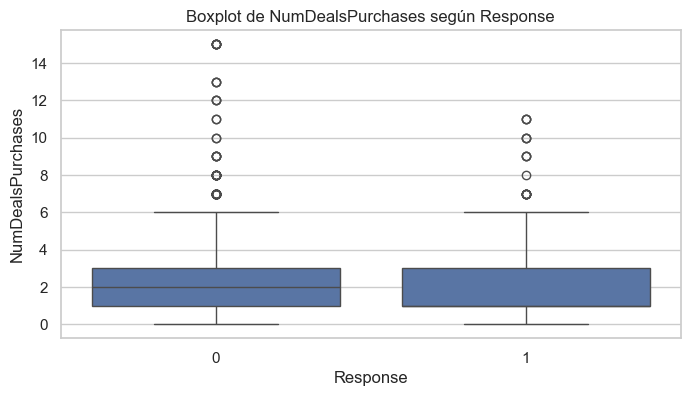

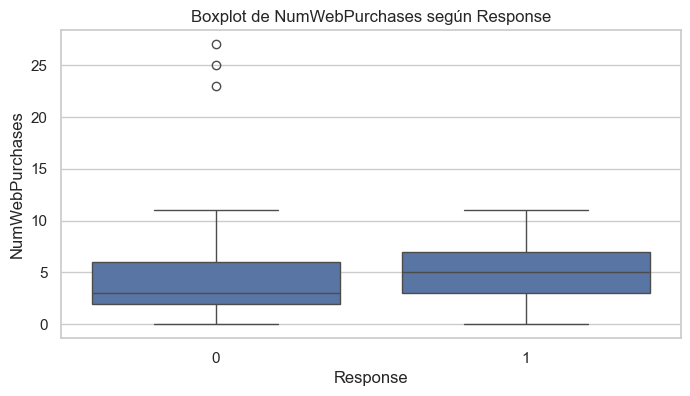

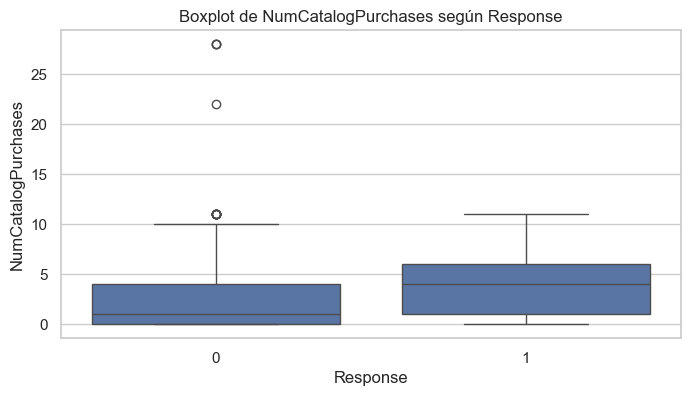

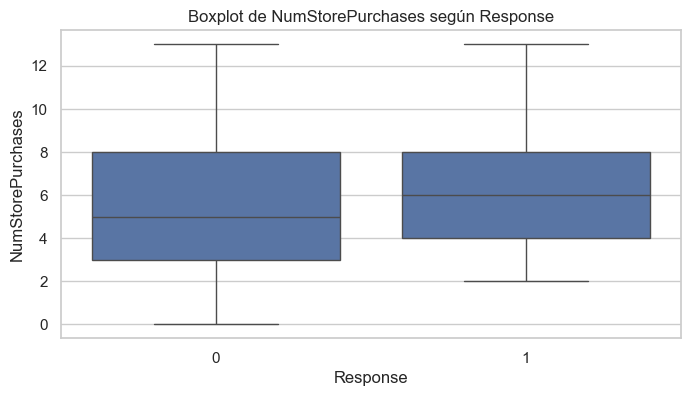

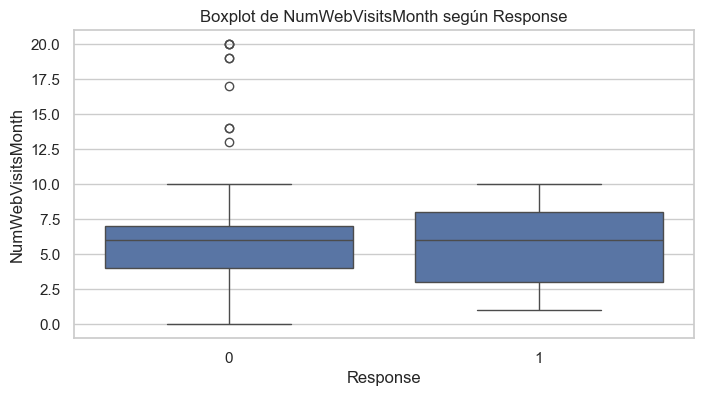

In [78]:
# Seleccionar variables de interés para boxplots
variables_boxplot = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                     'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

for var in variables_boxplot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Response', y=var, data=df)
    plt.title(f'Boxplot de {var} según Response')
    plt.xlabel('Response')
    plt.ylabel(var)
    plt.show()

Podemos observar que las variables se comportan de manera aceptable para poder continuar con el preprocesamiento y la modelacion

## Creacion de variables

In [79]:
# Aplicar transformaciones básicas para crear variables adicionales
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Customer_Seniority'] = (pd.to_datetime('today') - df['Dt_Customer']).dt.days

# Crear TotalMntSpent
df['TotalMntSpent'] = df[['MntWines','MntFruits','MntMeatProducts',
                          'MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

# Edad
df['Customer_Age'] = 2025 - df['Year_Birth']

# Mostrar un resumen
df[['Customer_Seniority', 'TotalMntSpent', 'Customer_Age']].describe()

,Customer_Seniority,TotalMntSpent,Customer_Age
count,2216.000000,2216.000000,2216.000000
mean,4339.521209,607.075361,56.179603
std,202.434667,602.900476,11.985554
min,3986.000000,5.000000,29.000000
25%,4166.000000,69.000000,48.000000
50%,4341.500000,396.500000,55.000000
75%,4515.000000,1048.000000,66.000000
max,4685.000000,2525.000000,132.000000


In [80]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Seniority,TotalMntSpent,Customer_Age
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,1,4649,1617,68
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,0,4099,27,71
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,0,4298,776,60
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,0,4125,53,41
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,0,4147,422,44
